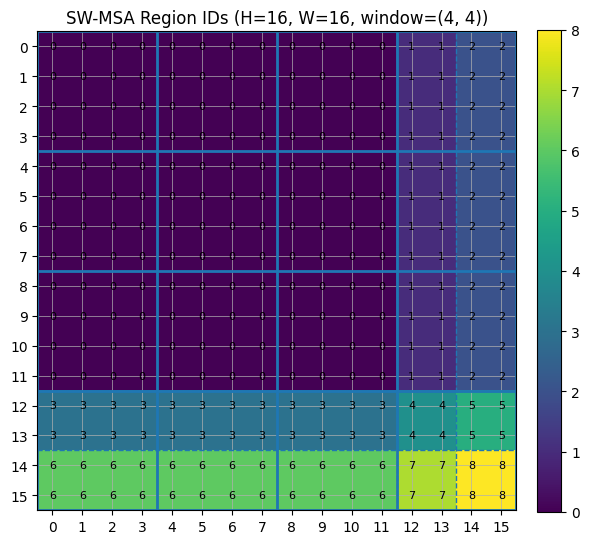

In [1]:
# SW-MSA mask visualization (matplotlib only; no seaborn)
import numpy as np
import matplotlib.pyplot as plt
import itertools

def compute_mask(
    H: int,
    W: int,
    window_size: tuple[int, int],
):
    """
    Build the 3x3 region id map used to create attention masks for SW-MSA.
    Regions are defined by cyclic-shift boundaries: [-w, -w/2, 0] for both H and W.
    """
    wH, wW = window_size
    assert wH % 2 == 0 and wW % 2 == 0, "window_size must be even so that shift = window/2 is an integer."
    sH, sW = wH // 2, wW // 2

    img_mask = np.zeros((H, W), dtype=np.int32)
    h_slices = (slice(-wH), slice(-wH, -sH), slice(-sH, None))
    w_slices = (slice(-wW), slice(-wW, -sW), slice(-sW, None))
    
    # Partition feature map into 3x3 areas created by cyclic shift boundaries
    for cnt, (h, w) in enumerate(itertools.product(h_slices, w_slices)):
        img_mask[h, w] = cnt

    return img_mask

def visualize_mask(mask: np.ndarray, window_size: tuple[int, int], title: str = "SW-MSA Region IDs"):
    """
    Visualize the region-id mask and overlay ids on cells. Draw gridlines for window partitions.
    """
    H, W = mask.shape
    wH, wW = window_size

    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(mask, interpolation="none")  # default colormap
    ax.set_title(title)
    ax.set_xticks(np.arange(W))
    ax.set_yticks(np.arange(H))
    ax.set_xticklabels(np.arange(W))
    ax.set_yticklabels(np.arange(H))
    ax.grid(which="both", linestyle='-', linewidth=0.5)

    # overlay numbers
    for i in range(H):
        for j in range(W):
            ax.text(j, i, str(mask[i, j]), ha="center", va="center", fontsize=8)

    # draw window partition gridlines
    for r in range(0, H + 1, wH):
        ax.axhline(r - 0.5, linewidth=2)
    for c in range(0, W + 1, wW):
        ax.axvline(c - 0.5, linewidth=2)

    # draw shift boundaries (-w and -w/2) relative to end of array
    sH, sW = wH // 2, wW // 2
    # horizontal boundaries
    ax.axhline(H - wH - 0.5, linestyle="--", linewidth=1)
    ax.axhline(H - sH - 0.5, linestyle="--", linewidth=1)
    # vertical boundaries
    ax.axvline(W - wW - 0.5, linestyle="--", linewidth=1)
    ax.axvline(W - sW - 0.5, linestyle="--", linewidth=1)

    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

def demo(H=8, W=8, window_size=(4,4)):
    mask = compute_mask(H, W, window_size)
    visualize_mask(mask, window_size, title=f"SW-MSA Region IDs (H={H}, W={W}, window={window_size})")

# === Run a quick demo ===
demo(H=16, W=16, window_size=(4,4))
